In [1]:
import requests
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../raw_data/tmdb-api/movies_keywords.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,movieId,imdbId,tmdbId,keywords
0,1,114709,862,"['martial arts', 'jealousy', 'toy', 'friendshi..."
1,2,113497,8844,"['giant insect', 'board game', 'jungle', 'disa..."
2,3,113228,15602,"['fishing', 'old man', 'best friend', 'duringc..."
3,4,114885,31357,"['based on novel or book', 'interracial relati..."
4,5,113041,11862,"['parent child relationship', 'baby', 'midlife..."


In [3]:
df.isnull().sum()

movieId       0
imdbId        0
tmdbId        0
keywords    624
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.shape

(61692, 4)

In [6]:
import ast

def to_list(x):
    x = ast.literal_eval(x)
    return x

In [7]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

def stop_words(x):
    text = ' '.join(x)
    stop_words = set(stopwords.words('english')) 

    word_tokens = word_tokenize(text) 

    text = [w for w in word_tokens if not w in stop_words] 

    return text

In [8]:
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()

    lemmatized = [lemmatizer.lemmatize(word) for word in text]

    return lemmatized

In [9]:
df.keywords = df.keywords.apply(to_list)
df.keywords = df.keywords.apply(stop_words)
df.keywords = df.keywords.apply(lemmatize)


print(type(df.keywords[0][0]))
df.info()

<class 'str'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61692 entries, 0 to 62315
Data columns (total 4 columns):
movieId     61692 non-null int64
imdbId      61692 non-null int64
tmdbId      61692 non-null int64
keywords    61692 non-null object
dtypes: int64(3), object(1)
memory usage: 4.9+ MB


In [10]:
df.head()

,movieId,imdbId,tmdbId,keywords
0,1,114709,862,"[martial, art, jealousy, toy, friendship, bull..."
1,2,113497,8844,"[giant, insect, board, game, jungle, disappear..."
2,3,113228,15602,"[fishing, old, man, best, friend, duringcredit..."
3,4,114885,31357,"[based, novel, book, interracial, relationship..."
4,5,113041,11862,"[parent, child, relationship, baby, midlife, c..."


In [75]:
df.to_csv('movie_keywords.csv')

In [42]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=df.keywords, min_count=1,size= 50)
model

In [43]:
model.wv['parent']

array([ 0.51136816, -0.43468145, -0.27408195,  0.49545017, -1.4327422 ,
       -1.000839  ,  1.8787379 ,  1.099524  , -2.0581946 ,  0.29444426,
        0.61241597,  2.5589094 , -1.0196756 , -1.732083  ,  1.9052498 ,
        2.9174209 ,  0.4924325 ,  1.0274806 , -0.98890775, -0.00722253,
       -1.1635256 , -1.8782846 , -0.9500291 ,  2.4965098 ,  1.3833534 ,
        1.7095946 ,  2.5426824 ,  0.936116  ,  0.87703836,  1.1062406 ,
        0.46273625, -1.6565608 ,  0.43126124, -1.4998888 ,  0.9442991 ,
        2.6564395 ,  0.5555501 ,  2.8222342 , -0.22335435,  0.5590314 ,
       -0.5905522 , -1.3108008 ,  0.9591162 , -2.3223963 ,  1.328473  ,
        2.0624864 ,  2.96336   ,  0.24598028,  0.68802154, -1.9634094 ],
      dtype=float32)

In [73]:
close_words = model.similar_by_word('milf')
close_words

/home/berns/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('unwanted', 0.9583146572113037),
 ('sisterhood', 0.9492254853248596),
 ('naive', 0.9393015503883362),
 ('unhappiness', 0.9364750981330872),
 ('role', 0.9357529878616333),
 ('hometown', 0.9324748516082764),
 ('nursing', 0.9301614165306091),
 ('author', 0.9268442988395691),
 ('disguised', 0.9258963465690613),
 ('eccentric', 0.9228020906448364)]

In [66]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)

        tsne = TSNE(n_components=2, random_state=0)
        np.set_printoptions(suppress=True)
        Y = tsne.fit_transform(arr)

        x_coords = Y[:, 0]
        y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()


/home/berns/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  
/home/berns/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/home/berns/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/home/berns/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This

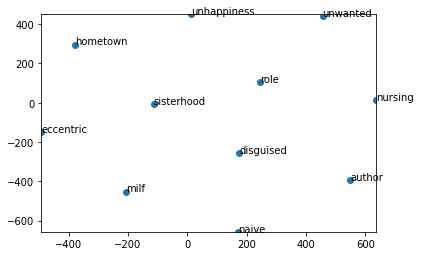

In [74]:
display_closestwords_tsnescatterplot(model, 'milf', 50)